# Exploratory Data Analysis (EDA): Demographics and Background
***

<p style="text-align: center;">
<img src="../../images/Demographic.png" alt="Demographics and Background" style="width: 1000px; height: 400px;">
</p>

In this section, we will analyze the **Demographics and Background** of students to understand how various factors influence academic performance. **To begin with, we will look at the distribution of the dataset**, including:

- The number of male and female students interviewed.
- The distribution of students across different grades (SS1 - SS3).
- The representation of students from various departments.

This analysis will focus on the following aspects:

1. **Gender**: 
   - Investigates potential **gender disparities** in performance across different subjects.
   - Examines the correlation between gender and participation in **extracurricular activities**.

2. **Age Group**: 
   - Analyzes whether **age affects performance** in exams.
   - Considers the hypothesis that older students may perform better due to increased life experience and maturity.

3. **Living Situation**: 
   - Assesses how living situations (e.g., living with parents, guardians, or alone) influence **academic performance**.
   - Explores potential performance differences based on **urban vs. rural** living conditions.

4. **Parent Education Level**: 
   - Evaluates the correlation between parental education levels and students' academic performance.
   - Investigates whether higher parental education levels result in increased **support at home**.

5. **Family Financial Status**: 
   - Examines how family financial status impacts students' access to essential resources, such as tutoring and learning materials.
   - Investigates performance disparities based on **financial status**.

This comprehensive analysis will provide valuable insights into the factors affecting student performance and highlight areas for potential intervention and support.


IMPORTING DEPENDENCIES

In [44]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

CONNECCTING TO SQLITE DATABASE

In [39]:
# Database path in the schema folder
db_path = '../../Schema/student_database.db'

# Creating a connection to the SQLite database
engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


***
> ## The number of male and female students interviewed.

In [158]:
# query to count the number of male and female students
gender_query = """
SELECT Gender, COUNT(*) AS Count
FROM student_performance
GROUP BY Gender;
"""
with engine.connect() as conn:
    gender_data = pd.read_sql(gender_query, conn)

# Display the result
print(gender_data)

   Gender  Count
0  Female     65
1    Male     35


Generating a bar plot for gender distribution

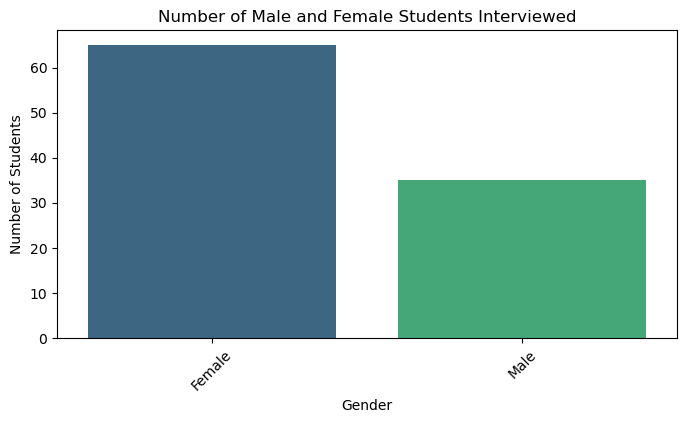

Visual saved at: ../../docs/gender_distribution.png


In [161]:
plt.figure(figsize=(8, 4))
sns.barplot(data=gender_data, x='Gender', y='Count', palette='viridis', hue = "Gender")
plt.title('Number of Male and Female Students Interviewed')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend = False

# Save the visual
image_file_path = '../../docs/gender_distribution.png'  # Update with the correct path
plt.savefig(image_file_path)
plt.show()

plt.close()
print(f"Visual saved at: {image_file_path}")

The table below shows the count of male and female students interviewed:

| **Gender** | **Count** |
|------------|-----------|
| Female     | 65        |
| Male       | 35        |

From the data, we observe that `the number of female students interviewed (65) is significantly higher than that of male students` (35).


***
> ## The distribution of students across different grades (SS1 - SS3).

In [130]:
# Query to count the number of students in each grade (SS1 - SS3)
grade_query = """
SELECT Class, COUNT(*) as Count
FROM student_performance
WHERE Class IN ('SS1', 'SS2', 'SS3')
GROUP BY Class;
"""

In [113]:
with engine.connect() as conn:
    class_data = pd.read_sql(grade_query, conn)

class_data

,Class,Count
0,SS1,15
1,SS2,17
2,SS3,68


In [ ]:
# Create a pie plot for the Class distribution

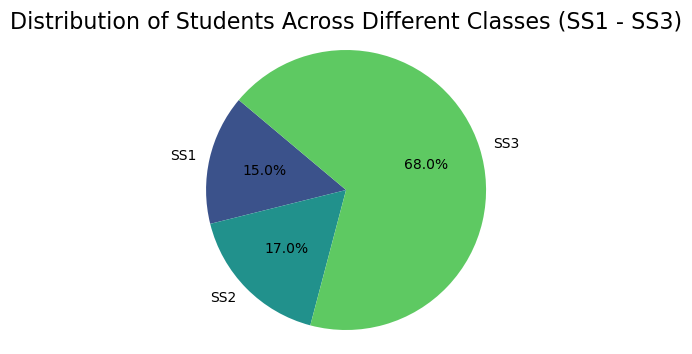

In [163]:
# Plotting a pie chart for the distribution of students across different grades
plt.figure(figsize=(8, 4))
plt.pie(class_data['Count'], labels=class_data['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_data)))
plt.title('Distribution of Students Across Different Classes (SS1 - SS3)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart as an image
image_path = '../../docs/grade_distribution_pie_chart.png'  # Change to your desired path
plt.savefig(image_path)
plt.show()


***
> ## The representation of students from various departments.

In [136]:
# SQL query to get the number of students in each department
department_query = """
SELECT Department, COUNT(*) as Count
FROM student_performance
GROUP BY Department;
"""

# Execute the query and fetch the results
department_distribution = pd.read_sql(department_query, engine)

# Display the fetched data
department_distribution

,Department,Count
0,Commercial,7
1,Humanities,43
2,Science,50


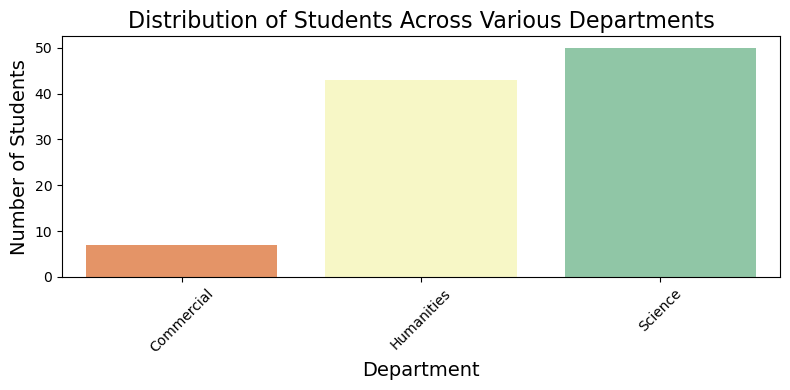

In [165]:
# Bar chart for student distribution across departments
plt.figure(figsize=(8, 4))
sns.barplot(data=department_distribution, x='Department', y='Count', palette='Spectral', hue = "Department")
plt.title('Distribution of Students Across Various Departments', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the bar chart as an image
image_path = '../../docs/department_distribution_bar_chart.png'  # Change to your desired path
plt.savefig(image_path)
plt.show()

### Distribution of Students Across Grades (SS1 - SS3)

The dataset includes **100 students** from various grades, specifically SS1, SS2, and SS3. Upon analyzing the data, we observe the following breakdown:

| Grade | Count |
|-------|-------|
| SS1   | 15    |
| SS2   | 17    |
| SS3   | 68    |

This shows a significantly higher number of students in **SS3**, with **68 students**, compared to **SS1** and **SS2**, which have **15** and **17 students** respectively. The data reflects a realistic distribution of students, `as often observed in many schools, where senior classes tend to have larger populations, possibly due to retention and incoming transfers`.

### Genuine Data Collection

It's important to note that this dataset was collected with careful consideration to ensure its authenticity. No artificial intelligence-generated data was used to inflate or skew the results. Every effort was made to maintain the integrity of the dataset, adhering to the **50 instructions** set for data collection. This allows us to draw genuine and reliable insights into student performance and demographics, preserving the **genuineness** and real-world applicability of the data.


***

***

## GENDER:

In [186]:

query = """
SELECT 
    s.gender, 
    p.subject, 
    AVG(p.performance_score) AS avg_performance
FROM 
    students s
JOIN 
    performance p 
ON 
    s.student_id = p.student_id
GROUP BY 
    s.gender, p.subject
ORDER BY 
    s.gender, p.subject;
"""

# Fetch data using SQLAlchemy
with engine.connect() as conn:
    result = conn.execute(text(query))
    data = result.fetchall()

# Convert to a Pandas DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(data, columns=['Gender', 'Subject', 'Avg_Performance'])


OperationalError: (sqlite3.OperationalError) no such table: students
[SQL: 
SELECT 
    s.gender, 
    p.subject, 
    AVG(p.performance_score) AS avg_performance
FROM 
    students s
JOIN 
    performance p 
ON 
    s.student_id = p.student_id
GROUP BY 
    s.gender, p.subject
ORDER BY 
    s.gender, p.subject;
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)